Accuracy: 0.9466666666666667 4
Accuracy: 0.9333333333333333 5
Accuracy: 0.92 6
Accuracy: 0.92 6
Accuracy: 0.96 3
Accuracy: 0.96 3
Accuracy: 0.96 3
Accuracy: 0.9733333333333334 2
Accuracy: 0.9733333333333334 2


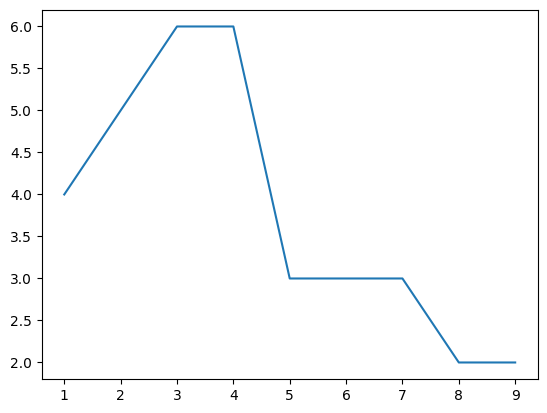

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

#1

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, test_size = 0.5, random_state = 13)

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            distances = np.sqrt(np.sum((self.X_train - X_test[i])**2, axis=1))
            k_nearest_neighbors = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_neighbors]
            labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predictions.append(labels[np.argmax(counts)])
        return predictions

error = []
for k in range(1,10):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracynnorm = accuracy_score(y_test, y_pred, normalize = False)
    error.append(len(y_test) - accuracynnorm)
    print('Accuracy:', accuracy, len(y_test) - accuracynnorm)

plt.plot(np.linspace(1,9,9), error)
plt.show()

In [89]:
#2

from sklearn.neighbors import KNeighborsClassifier

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracynnorm = accuracy_score(y_test, y_pred, normalize = False)
    print('Accuracy:', accuracy, len(y_test) - accuracynnorm)

Accuracy: 0.9466666666666667 4
Accuracy: 0.9333333333333333 5
Accuracy: 0.92 6
Accuracy: 0.92 6
Accuracy: 0.96 3
Accuracy: 0.96 3
Accuracy: 0.96 3
Accuracy: 0.9733333333333334 2
Accuracy: 0.9733333333333334 2


In [90]:
#3

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
print(clf.predict(iris.data[:1, :]))
print(clf.predict_proba(iris.data[:1, :]))

[0]
[[1. 0. 0.]]


In [91]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.png")

True

In [92]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28, 28, 1)

#3.1

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#3.2

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [93]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


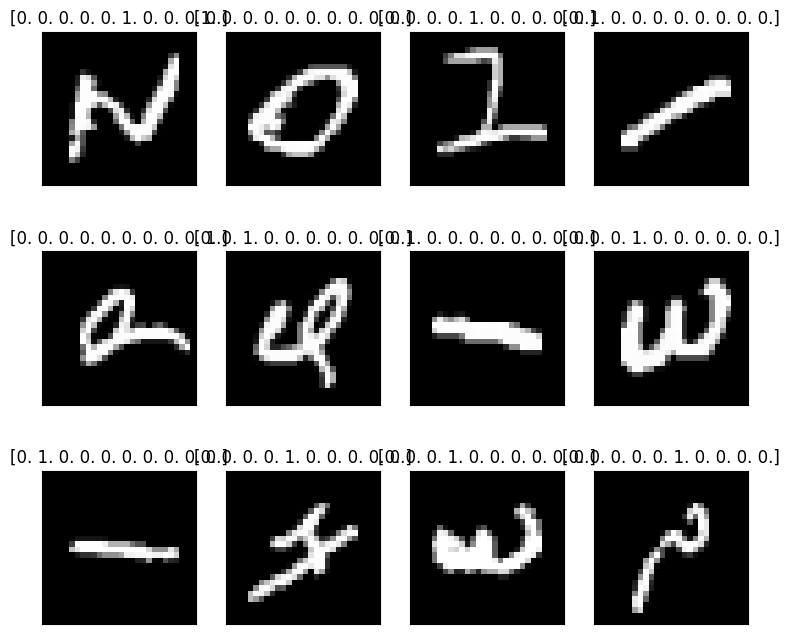

In [94]:
#3.3

plot_mnist(x_train, y_train, 28, 28)

In [100]:
#3.4

x = np.vstack((x_train, x_test))
y = np.vstack((y_train, y_test))
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 13)

In [110]:
#3.5

x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(x_train_flat, y_train)
y_pred = clf.predict(x_test_flat)
print(y_pred)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [116]:
#3.6

print(f1_score(y_test, y_pred, average="weighted"))

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test_labels, y_pred_labels))

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, y_pred, target_names=target_names))

0.8580650138826197
[[1963    2   37   12    1   20   12    2   22    5]
 [  53 2109   23    7    9   12    4    9   15    4]
 [ 190   27 1746   36   31   17   23   29   49   25]
 [ 200   19   50 1739   16  107    9   14   57   34]
 [ 112    9    5    0 1698    9   19    9   20  106]
 [ 149   14   16   67   29 1436   47    7   52   23]
 [ 126   18   30    2   27   39 1803    3   17    6]
 [ 169   17   50   12   26    8    2 1884    5   48]
 [ 173   37   65   59   34   46   33    5 1526   72]
 [ 144    8   13   26  113   46   15   34   38 1655]]
              precision    recall  f1-score   support

     class 0       0.93      0.92      0.93      2076
     class 1       0.93      0.94      0.94      2245
     class 2       0.86      0.80      0.83      2173
     class 3       0.89      0.77      0.83      2245
     class 4       0.86      0.85      0.86      1987
     class 5       0.83      0.78      0.80      1840
     class 6       0.92      0.87      0.89      2071
     class 7     

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
